In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib as mlp
%matplotlib inline

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
df = pd.read_csv("data_2_cat.csv")

In [52]:
df = df.drop(df.columns[0], axis=1)

In [53]:
df['tier'] = df['tier'].replace(['First','Second'],['1','2'])
df['tier'] = df['tier'].astype(float)

In [54]:
df.head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,tier
0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1.0
1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,1.0
2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.0
3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,1.0
4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1.0


In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
df_copy = df

In [57]:
df_copy = df_copy.drop('Country',axis=1)

In [58]:
# Creating independent and dependent variables
X = df_copy.drop('tier',axis=1)
y = df_copy['tier']

In [59]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (744, 9), (744,)
Train Data: (187, 9), (187,)


Feature engineering

In [60]:
X_train.dtypes

Year                              int64
Happiness Rank                    int64
Happiness Score                 float64
GDP per Capita                  float64
Social support                  float64
Life Expectancy                 float64
Freedom to make life choices    float64
Perceptions of corruption       float64
Generosity                      float64
dtype: object

In [61]:
X_train.head()

,Year,Happiness Rank,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
223,2016,66,5.648,1.143720,0.756950,0.661890,0.461450,0.052030,0.369510
392,2017,78,5.279,0.951484,1.137854,0.541452,0.260288,0.057472,0.319931
442,2017,128,4.180,0.603049,0.904780,0.048642,0.447706,0.130062,0.201237
698,2019,73,5.523,1.051000,1.361000,0.871000,0.197000,0.080000,0.142000
579,2018,110,4.623,0.720000,1.034000,0.441000,0.626000,0.174000,0.230000


# # Decision Tree Classifier with criterion gini index

In [63]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [64]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

#Predict the Test set results with criterion gini index

In [65]:
y_pred_gini = clf_gini.predict(X_test)

Check accuracy score with criterion gini index

In [66]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 1.0000


Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

Compare the train-set and test-set accuracy
Now, I will compare the train-set and test-set accuracy to check for overfitting.



In [67]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1.,
       1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2.,
       1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2.,
       1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2.,
       1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1.,
       1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1.,
       1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2.,
       1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2.,
       1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1.,
       2., 1., 1., 2., 2.

In [68]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 1.0000


Check for overfitting and underfitting

In [69]:
 #print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


Here, the training-set accuracy score is 1.0000 while the test-set accuracy to be 1.0000. These two values are quite same. So, there is no sign of overfitting.

# Visualize decision-trees

[Text(334.8, 326.15999999999997, 'X[1] <= 78.5\ngini = 0.499\nsamples = 744\nvalue = [392, 352]'),
 Text(167.4, 108.72000000000003, 'gini = 0.0\nsamples = 392\nvalue = [392, 0]'),
 Text(502.20000000000005, 108.72000000000003, 'gini = 0.0\nsamples = 352\nvalue = [0, 352]')]

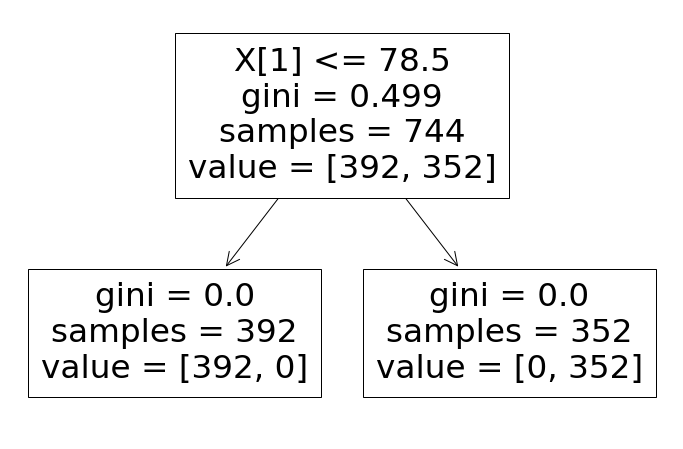

In [70]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

# Decision Tree Classifier with criterion entropy

In [75]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Predict the Test set results with criterion entropy¶

In [76]:
y_pred_en = clf_en.predict(X_test)

Check accuracy score with criterion entrop

In [77]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 1.0000


Compare the train-set and test-set accuracy¶

In [78]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1., 1.,
       1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2.,
       1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2.,
       1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2.,
       1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1.,
       1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1.,
       1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2.,
       1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2.,
       1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1.,
       2., 1., 1., 2., 2.

In [79]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 1.0000


Check for overfitting and underfitting

In [80]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


[Text(334.8, 326.15999999999997, 'X[1] <= 78.5\nentropy = 0.998\nsamples = 744\nvalue = [392, 352]'),
 Text(167.4, 108.72000000000003, 'entropy = 0.0\nsamples = 392\nvalue = [392, 0]'),
 Text(502.20000000000005, 108.72000000000003, 'entropy = 0.0\nsamples = 352\nvalue = [0, 352]')]

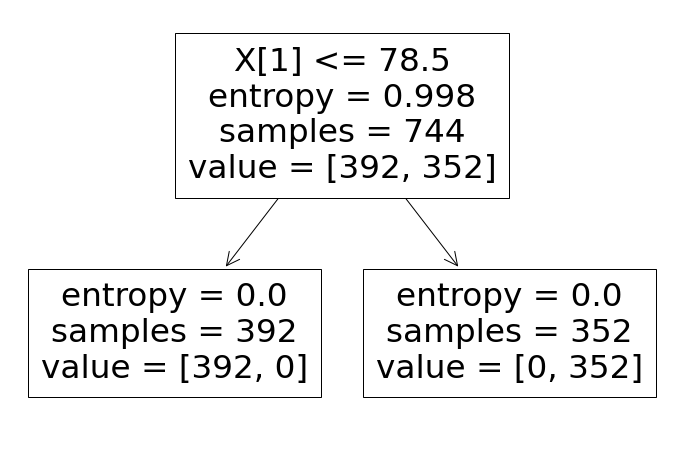

In [81]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

# confusion matrix

In [86]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 76   0]
 [  0 111]]


# classification report

In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        76
         2.0       1.00      1.00      1.00       111

    accuracy                           1.00       187
   macro avg       1.00      1.00      1.00       187
weighted avg       1.00      1.00      1.00       187



1.In this project, I build a Decision-Tree Classifier model to predict world happiness report.

2.I build two models, one with criterion gini index and another one with criterion entropy. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 1.0000.

3.In the model with criterion gini index, the training-set accuracy score is 1.0000 while the test-set accuracy to be 1.0000. These two values are quite same. So, there is no sign of overfitting.

4.Similarly, in the model with criterion entropy, the training-set accuracy score is 1.0000 while the test-set accuracy to be 1.0000.We get the same values as in the case with criterion gini. So, there is no sign of overfitting.

5.In both the cases, the training-set and test-set accuracy score is the same. It may happen because of  dataset.
The confusion matrix and classification report yields very good model performance.